In [1]:
from time import time

import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import pandas as pd
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import seaborn as sns
sns.set(context='notebook', style='white')

%matplotlib inline

np.random.seed(2016)

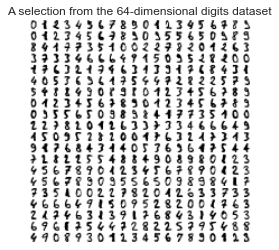

In [2]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

plt.close('all')

digits = datasets.load_digits() #n_class=n_class)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


PALETTE = sns.color_palette('husl', n_colors=len(np.unique(digits.target)))

# PALETTE = sns.diverging_palette(220, 20, n=10, center='dark')
digits_row_colors = [PALETTE[i] for i in digits.target]

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None, random_samples=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    if random_samples is None:
        random_samples = np.arange(digits.data.shape[0]).astype(int)
    for i, random_sample in enumerate(random_samples):
        plt.text(X[i, 0], X[i, 1], str(digits.target[random_sample]),
                 color=PALETTE[int(y[random_sample])],
                 fontdict={'weight': 'bold', 'size': 9})

        
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i, random_sample in enumerate(random_samples):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[random_sample], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset');
sns.despine(bottom=True, left=True)

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


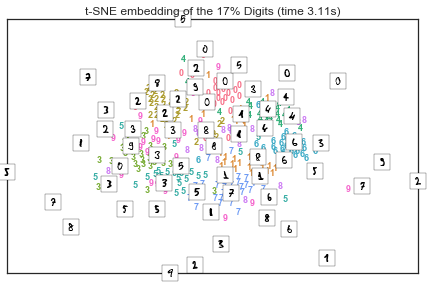

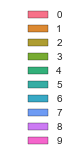

In [30]:
from sklearn.manifold import TSNE

def explore_digits_subsets(percent_of_data):
    
    smusher = TSNE(n_components=2)
#     percent_of_data = 10
    fraction_of_data = percent_of_data/100
    n_samples = fraction_of_data * digits.data.shape[0]

    random_samples = np.random.choice(np.arange(digits.data.shape[0]).astype(int), 
                     replace=False, size=n_samples)
    subset = digits.data[random_samples]
    t0 = time()
    smushed = smusher.fit_transform(subset)
    
    title = "t-SNE embedding of the {:d}% Digits (time {:.2f}s)".format(
        percent_of_data, time() - t0)
    plot_embedding(smushed, title, random_samples)
    # Plot a legend by hand
    fig, ax = plt.subplots(figsize=(1, 1))
    for digit, color in zip(digits.target, PALETTE):
        ax.bar(0, 0, color=color, label=digit)
    ax.patches = []
    ax.legend(loc='center')
    ax.axis('off')

ipywidgets.interact(explore_digits_subsets,
                    percent_of_data=ipywidgets.IntSlider(min=1, max=100, value=100));